In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [80]:
# @title Default title text
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/TitanicSurvivor/train.csv')
#test = pd.read_csv('gdrive/My Drive/Colab Notebooks/TitanicSurvivor/test.csv')

In [ ]:
!pwd

/content


In [ ]:
!ls

gdrive	sample_data


In [ ]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

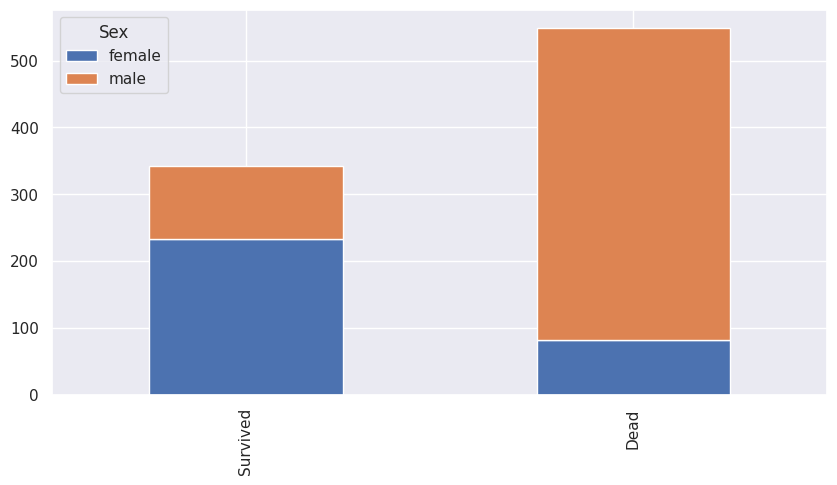

In [ ]:
bar_chart('Sex')

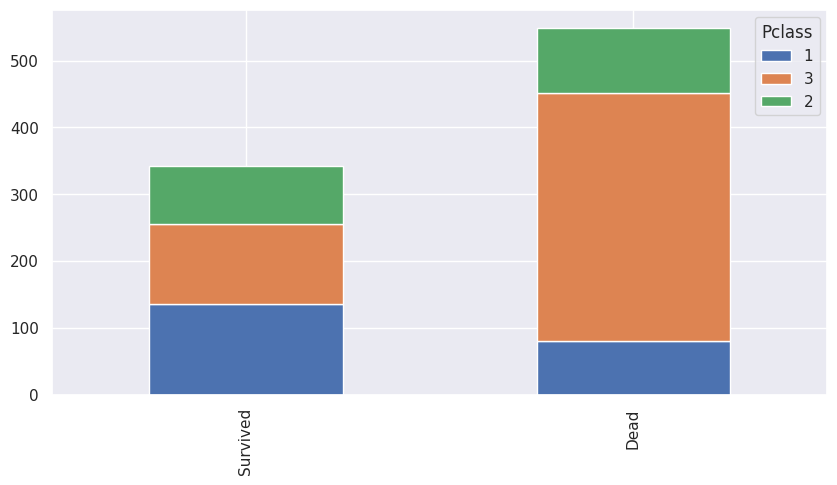

In [ ]:
bar_chart('Pclass')

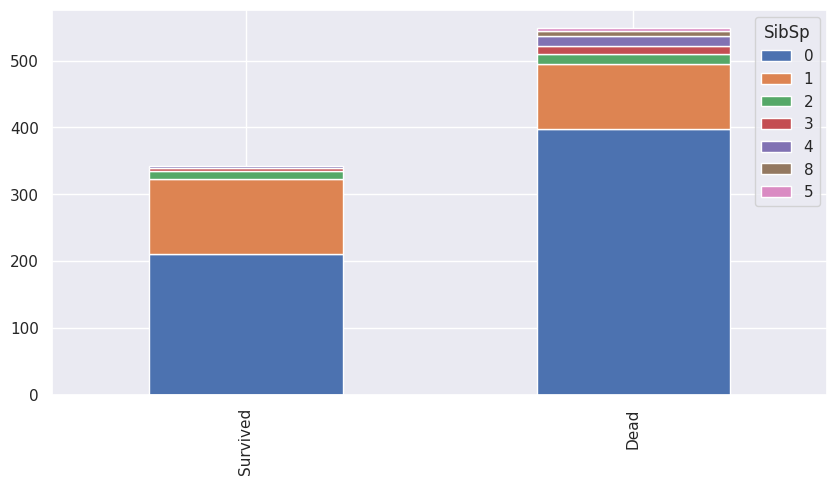

In [ ]:
bar_chart('SibSp')

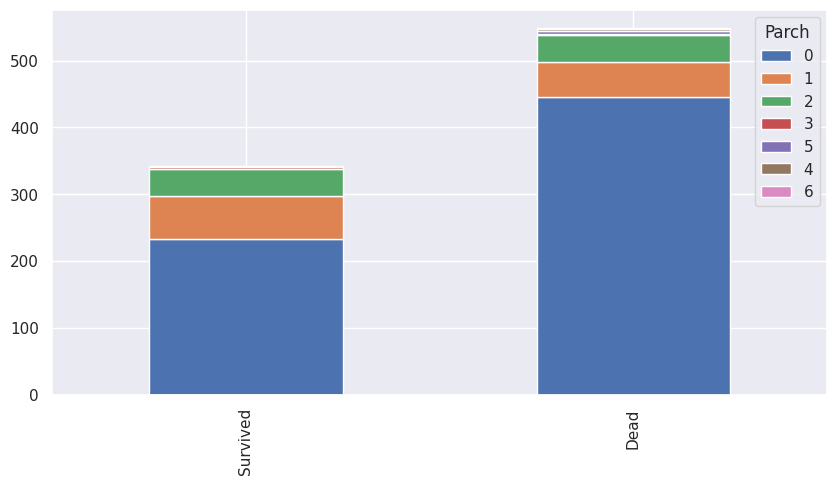

In [ ]:
bar_chart('Parch')

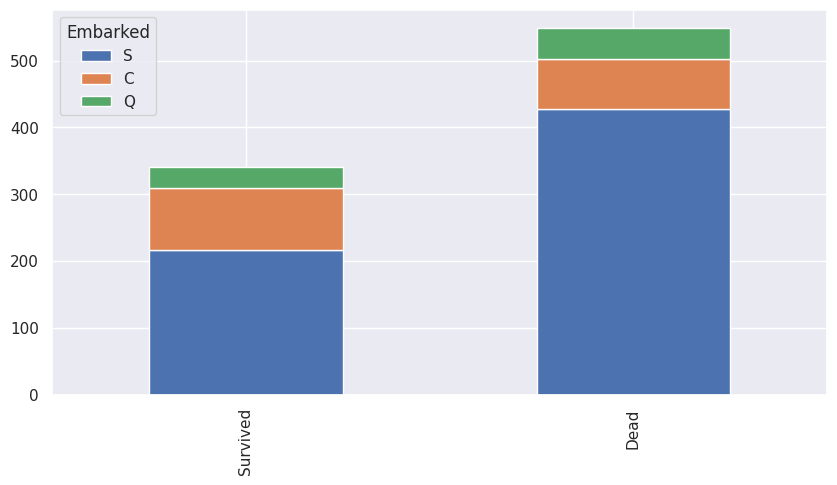

In [ ]:
bar_chart('Embarked')

In [79]:
# print(type(train.loc[i, 'Name']))

<class 'str'>


In [78]:
# for i in range(len(train)):
#     train.loc[i, 'Title'] = train.loc[i, 'Name'].split(',')[1].split('.')[0].strip()

In [81]:
train_test_data = [train]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [82]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [10]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [11]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


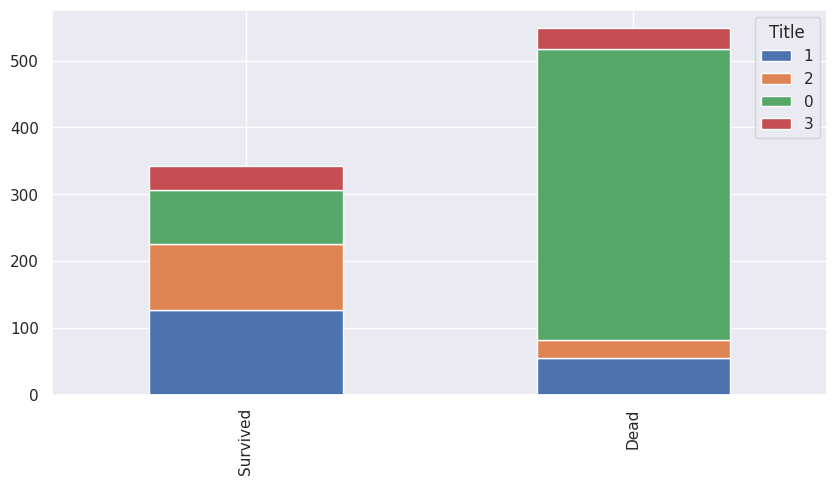

In [12]:
bar_chart('Title')

In [13]:
train.drop('Name', axis=1, inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

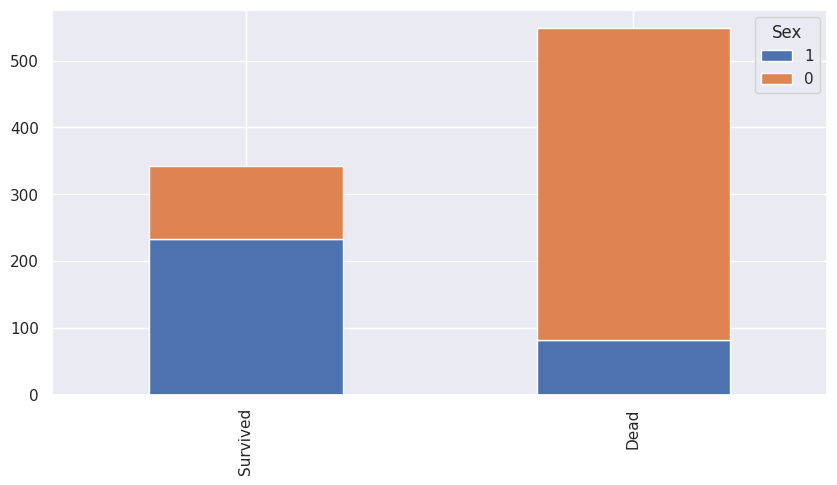

In [ ]:
bar_chart('Sex')

In [16]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [17]:
train.groupby("Title")["Age"].transform("median")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


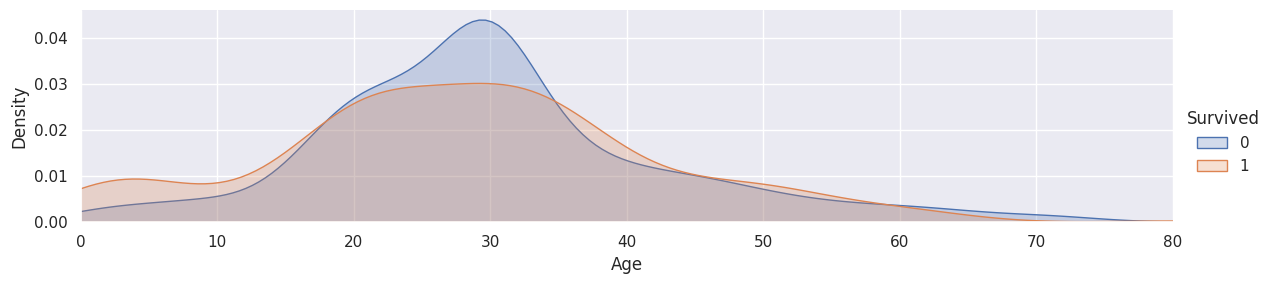

In [18]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

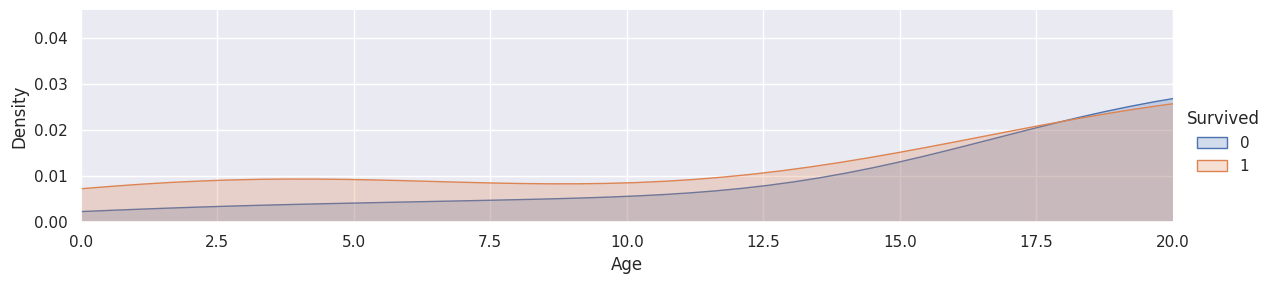

In [19]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 30.0)

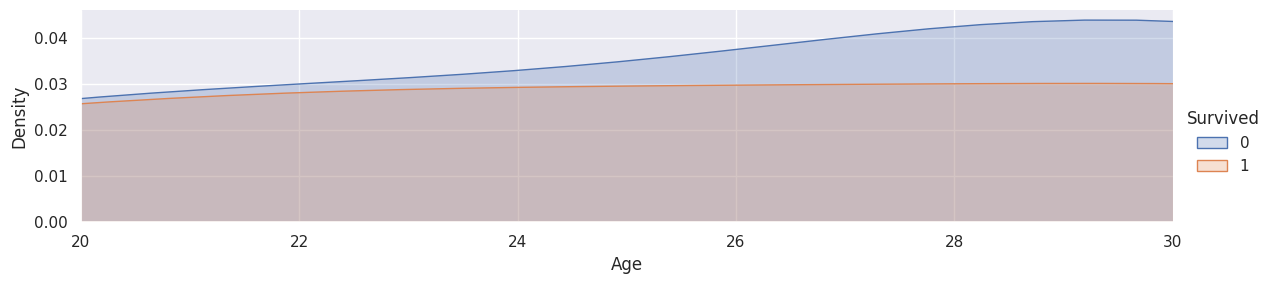

In [20]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 40.0)

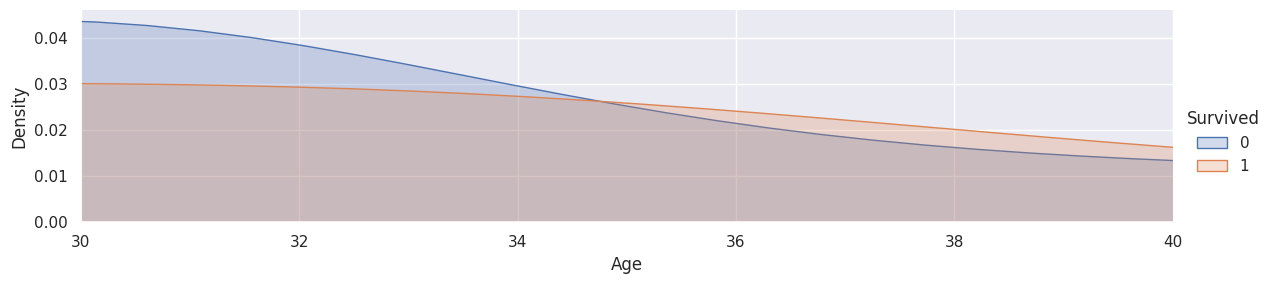

In [21]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(40.0, 60.0)

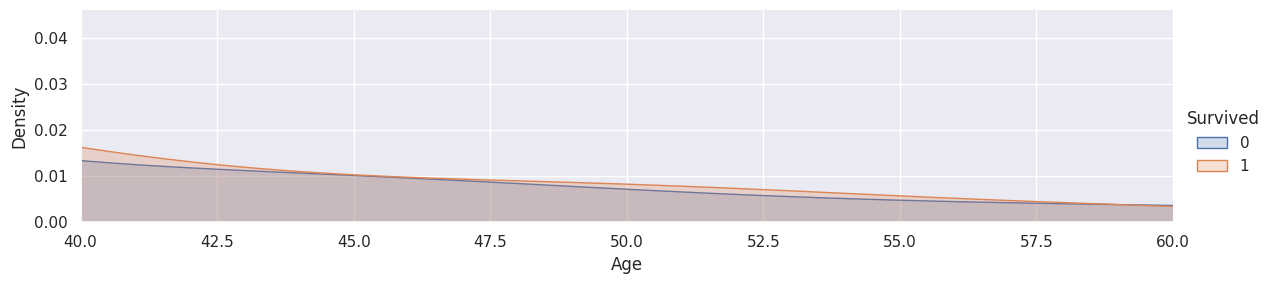

In [22]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#     dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [24]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = [0] * len(dataset.loc[ dataset['Age'] <= 16, 'Age'])
    #print([0] * len(dataset.loc[ dataset['Age'] <= 16, 'Age']))
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = [1] * len(dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'])
    #print([1] * len(dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age']))
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = [2] * len(dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'])
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = [3] * len(dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'])
    dataset.loc[ dataset['Age'] > 62, 'Age'] = [4] * len(dataset.loc[ dataset['Age'] > 62, 'Age'])

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


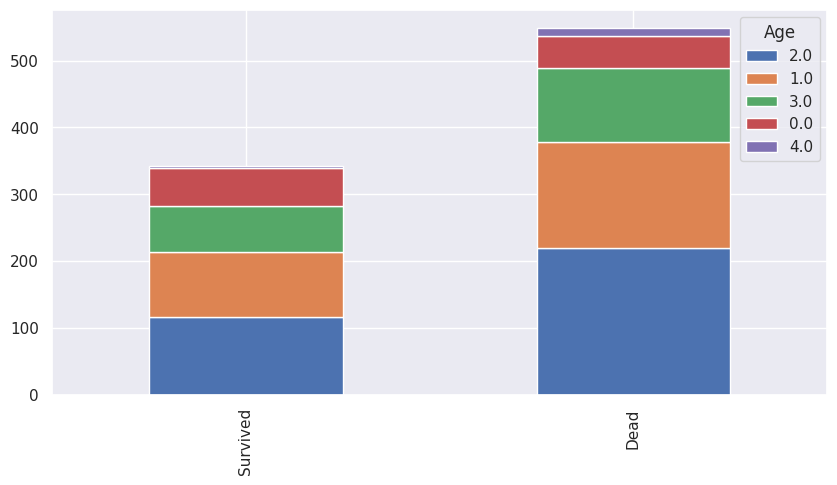

In [ ]:
bar_chart('Age')

<Axes: >

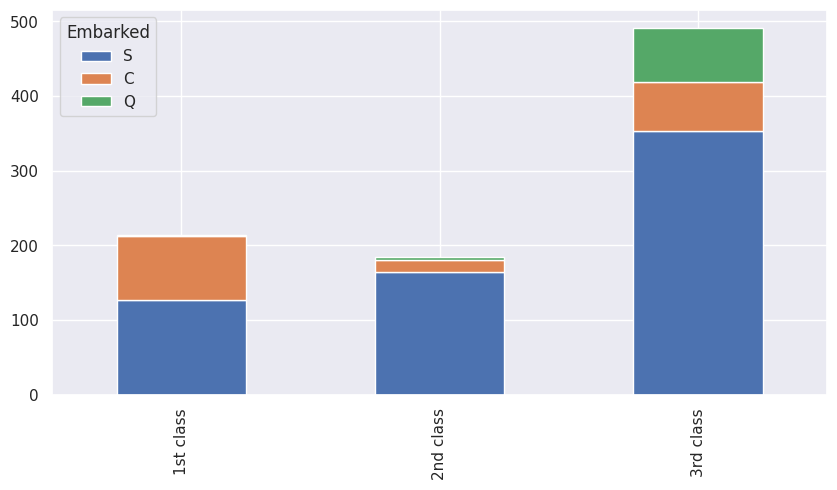

In [26]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [27]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [29]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [30]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


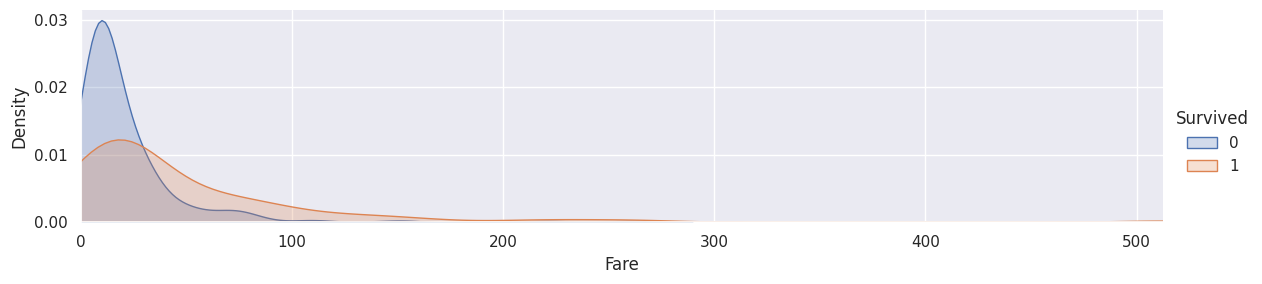

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

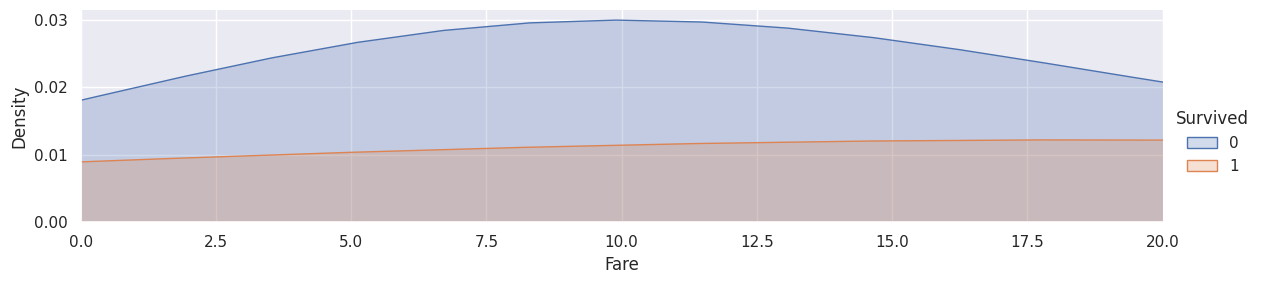

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 30.0)

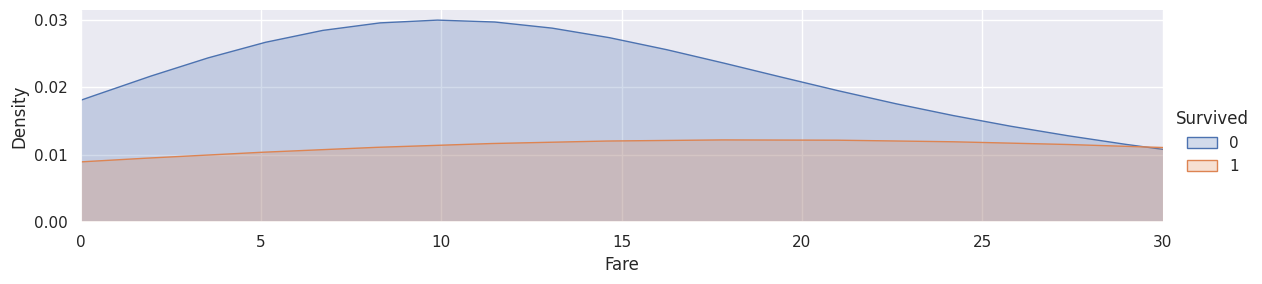

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [34]:
fare_categories = [0, 1, 2, 3]

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = fare_categories[0]
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = fare_categories[1]
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = fare_categories[2]
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = fare_categories[3]

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [37]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [38]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

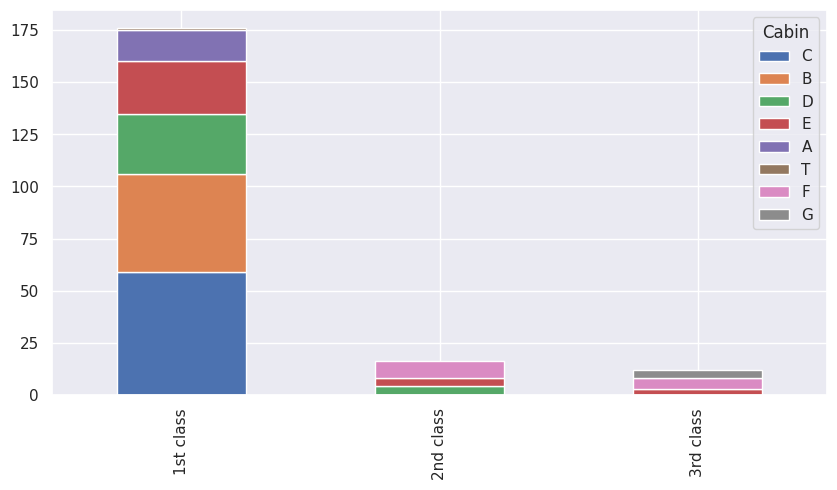

In [39]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [40]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [42]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [43]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

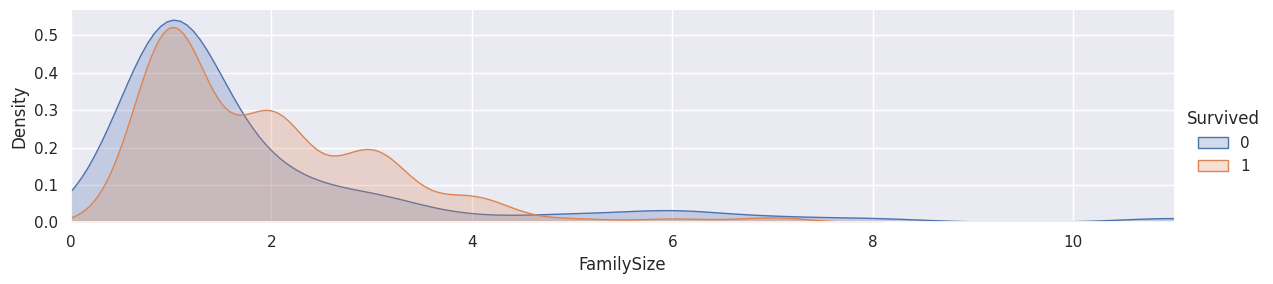

In [44]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [50]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [53]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
#train = train.drop(['PassengerId'], axis=1)

KeyError: "['Ticket', 'SibSp', 'Parch'] not found in axis"

In [54]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [55]:
# (X_TRAIN->train_data, Y_TRAIN->target), X_TEST, Y_TEST
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [84]:
# import numpy as np

# # Create a list of numbers
# data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# # Shuffle the list with a random seed of 42
# np.random.seed(42)
# shuffled_data_1 = np.random.permutation(data)

# # Shuffle the list with a different random seed
# np.random.seed(10)
# shuffled_data_2 = np.random.permutation(data)

# # Print the shuffled lists
# print("Shuffled data with random_state=42:", shuffled_data_1)
# print("Shuffled data with random_state=10:", shuffled_data_2)

In [56]:
#Start Confusion Matrix Evaluation
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.30, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)



X_train:  (623, 9)
X_test:  (268, 9)
y_train:  (623,)
y_test:  (268,)
709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
137    0
696    0
485    0
244    0
344    0
853    1
621    1
653    1
886    0
110    0
294    0
447    1
192    1
682    0
538    0
819    0
30     0
673    1
63     0
396    0
877    0
141    1
793    0
235    0
204    1
620    0
23     1
198    1
842    1
739    0
120    0
477    0
837    0
790    0
362    0
86     0
67     0
350    0
210    0
659    0
448    1
820    1
360    0
802    1
280    0
585    1
70     0
299    1
211    1
44     1
408    0
446    1
426    1
168    0
196    0
772    0
72     0
422    0
532    0
591    1
312    0
311    1
889    1
835    1
833    0
605    0
767    0
539    1
357    0
254    0
266    0
66     1
319    1
778    0
174    0
493    0
215    1
309    1
822    0
250    0
165    1
541    0
625    0
388    0
76     0
281    0
712    1
338    1
327    1
321    0
545    0
590    0
291    1
465

In [57]:
nb = DecisionTreeClassifier()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[126  31]
 [ 36  75]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       157
           1       0.71      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

75.0


AUC Score: 0.8365754289321169


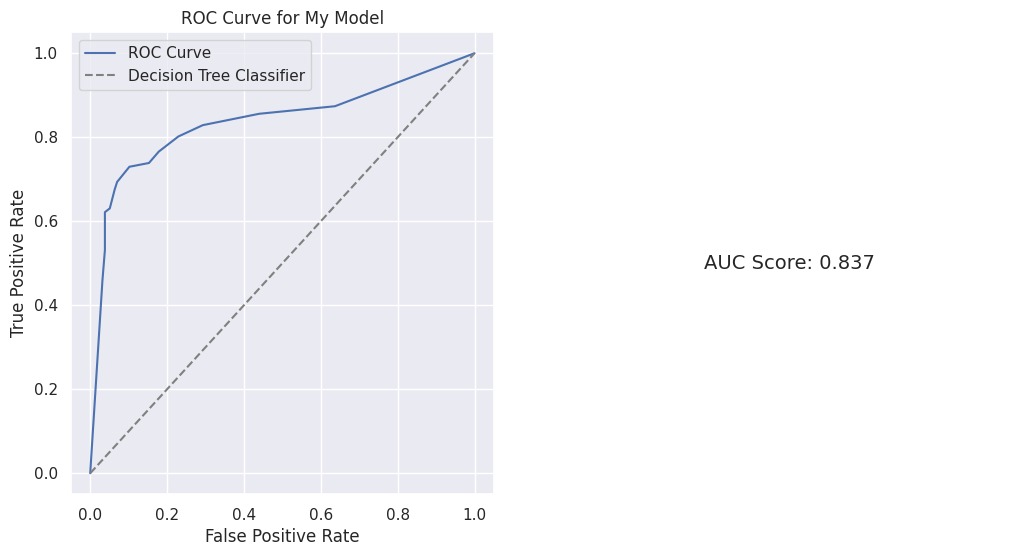

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = nb.predict_proba(X_test)[:, 1]

# Get the true labels
y_true = y_test

# Calculate the AUC score and ROC curve
auc_score = roc_auc_score(y_true, y_pred_proba)

# Print the AUC score
print(f"AUC Score: {auc_score}")

fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fpr, tpr, label="ROC Curve")
ax1.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Decision Tree Classifier")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve for My Model")
ax1.legend()

# Print the AUC score on the second subplot
ax2.text(0.5, 0.5, f"AUC Score: {auc_score:.3f}", ha="center", va="center", fontsize=14)
ax2.axis("off")

# Show the figure
plt.show()

In [60]:
nb = RandomForestClassifier(n_estimators=13)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[141  16]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

82.83582089552239


In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [64]:
result = nb.predict(X_test)
submission = pd.DataFrame({'PassengerId':X_test.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'gdrive/My Drive/Colab Notebooks/TitanicSurvivor/Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(268, 2)
Saved file: gdrive/My Drive/Colab Notebooks/TitanicSurvivor/Titanic Predictions.csv


In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# Example ground truth and predictions
y_true = [0, 1, 2, 2, 1]
y_pred = [0, 1, 1, 2, 1]

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average=None)

# Calculate weighted average precision, recall, and F1-score
weighted_precision = sum(precision[i] * support[i] for i in range(len(precision))) / sum(support)
weighted_recall = sum(recall[i] * support[i] for i in range(len(recall))) / sum(support)
weighted_f1_score = sum(f1_score[i] * support[i] for i in range(len(f1_score))) / sum(support)

print("Weighted Average Precision:", weighted_precision)
print("Weighted Average Recall:", weighted_recall)
print("Weighted Average F1-score:", weighted_f1_score)

# Calculate classification report
report = classification_report(y_true, y_pred, digits=4, target_names=['class 0', 'class 1', 'class 2'])
print("Classification Report:")
print(report)


Weighted Average Precision: 0.8666666666666666
Weighted Average Recall: 0.8
Weighted Average F1-score: 0.7866666666666667
Classification Report:
              precision    recall  f1-score   support

     class 0     1.0000    1.0000    1.0000         1
     class 1     0.6667    1.0000    0.8000         2
     class 2     1.0000    0.5000    0.6667         2

    accuracy                         0.8000         5
   macro avg     0.8889    0.8333    0.8222         5
weighted avg     0.8667    0.8000    0.7867         5

